In [107]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
from numpy import mean as avg
from pandas import DataFrame as df
# Pretty display for notebooks
%matplotlib inline

In [125]:
data=pd.read_csv("FIFA.csv")
print("Number of rows : {}".format(len(data)))
data.head()

Number of rows : 18159


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,85,95,28,31,23,7,11,15,14,11
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,75,96,33,28,26,6,11,15,14,8
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,81,94,27,24,33,9,9,15,15,11
3,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,...,75,82,87,92,91,11,8,9,7,11
4,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,...,82,84,60,76,73,13,9,7,14,9


In [126]:
#Loose data we don't want
data=data.drop(["ID","Name"], axis=1)
data=data.dropna()
print("Number of rows : {}".format(len(data)))
#Check data types
data.dtypes

Number of rows : 17907


Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate Defence            object
Work Rate Attack             object
Body Type                    object
Position                     object
Height                       object
Weight                        int64
Crossing                      int64
Finishing                     int64
HeadingAccuracy               int64
ShortPassing                  int64
Volleys                       int64
Dribbling                     int64
Curve                         int64
FKAccuracy                    int64
LongPassing                   int64
BallControl                 

In [127]:
#Height brough in as wrong datatype
#Converting string of height in ft to float in cm
l=data[['Height']].values.tolist()
ll=[]
for i in range(len(l)):
    ft=int(l[i][0][0])
    inches=int(l[i][0][2])
    val=30.48*ft+2.54*inches
    ll.append(int(val))
    
data["Height"]=ll

In [128]:
data=data.fillna(method="ffill")

In [129]:
#Same again for wage and value but this time we will convert them straight to floats
data["Wage"]=pd.to_numeric(data["Wage"], errors='coerce')
data["Value"]=pd.to_numeric(data["Value"], errors='coerce')
data["Wage"]=data["Wage"].astype(int)
data["Value"]=data["Value"].astype(int)
data.dtypes

Age                          int64
Nationality                 object
Overall                      int64
Potential                    int64
Club                        object
Value                        int32
Wage                         int32
Special                      int64
Preferred Foot              object
International Reputation     int64
Weak Foot                    int64
Skill Moves                  int64
Work Rate Defence           object
Work Rate Attack            object
Body Type                   object
Position                    object
Height                       int64
Weight                       int64
Crossing                     int64
Finishing                    int64
HeadingAccuracy              int64
ShortPassing                 int64
Volleys                      int64
Dribbling                    int64
Curve                        int64
FKAccuracy                   int64
LongPassing                  int64
BallControl                  int64
Acceleration        

In [130]:
#For the remaining categorical data we will do a one-hot encoding
from pandas import get_dummies 
data = get_dummies(data)
data.columns

Index([u'Age', u'Overall', u'Potential', u'Value', u'Wage', u'Special',
       u'International Reputation', u'Weak Foot', u'Skill Moves', u'Height',
       ...
       u'Position_RB', u'Position_RCB', u'Position_RCM', u'Position_RDM',
       u'Position_RF', u'Position_RM', u'Position_RS', u'Position_RW',
       u'Position_RWB', u'Position_ST'],
      dtype='object', length=898)

In [131]:
#Quick examination of the data set
print("Number of rows :: {}".format(data.shape[0]))
print("Number of columns :: {}".format(data.shape[1]))
print("\n")
print("Wages Summary")
print(data['Wage'].describe().round(decimals=0))
print("\n")
print("Value Summary")
print(data['Value'].describe().round(decimals=0))

Number of rows :: 17907
Number of columns :: 898


Wages Summary
count     17907.0
mean       9888.0
std       22149.0
min        1000.0
25%        1000.0
50%        3000.0
75%        9000.0
max      565000.0
Name: Wage, dtype: float64


Value Summary
count        17907.0
mean       2450133.0
std        5633207.0
min          10000.0
25%         325000.0
50%         700000.0
75%        2100000.0
max      118500000.0
Name: Value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002DABD048>,
      dtype=object)

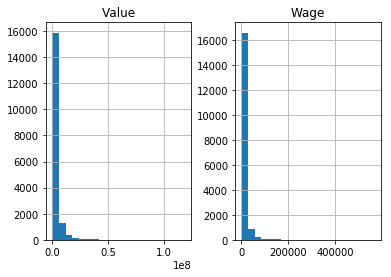

In [132]:
data[["Wage","Value"]].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029A804E0>,
      dtype=object)

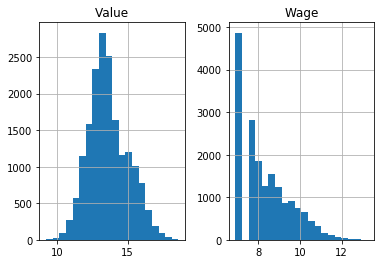

In [133]:
skewed_data=['Value', 'Wage']
data_skewed=data[skewed_data]
data_transformed=data_skewed.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
data_transformed.hist(bins=20)

In [134]:
#Now that our data looks better we will use this and split it into our features and data we aim to predict
features=data.drop(skewed_data, axis=1)
Val=[]
Wage=[]
#For the project I am going to have two prediction models using the same features but to predict either Value or Wage
#Keeping data accuracy but using integer values
for i in data_transformed["Wage"]:
    Wage.append(int(i*1000000))
    
for i in data_transformed["Value"]:
    Val.append(int(i*1000000))

data_transformed["Wage"]=Wage
data_transformed["Value"]=Val

In [135]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_trainV, X_testV, y_trainV, y_testV = train_test_split(features, 
                                                    data_transformed["Value"], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

X_trainW, X_testW, y_trainW, y_testW = train_test_split(features, 
                                                    data_transformed["Wage"], 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_trainV.shape[0]))
print("Testing set has {} samples.".format(X_testV.shape[0]))

Training set has 14325 samples.
Testing set has 3582 samples.


In [165]:
# Import train_test_split
from sklearn.cross_validation import train_test_split
#PCA packages
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
#SVM and Gridsearch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [166]:
#Apply PCA to our feature data
print("Original number of features {}".format(features.shape[1]))
top_features=100
print("Taking the top {} features via PCA".format(top_features))

pca=PCA(n_components=top_features, whiten=True, svd_solver='randomized')
#Fit on training data
pcaV=pca.fit(X_trainV)
pcaW=pca.fit(X_trainW)

Original number of features 896
Taking the top 100 features via PCA


In [167]:
XtrainWpca=pcaW.transform(X_trainW)
XtrainVpca=pcaV.transform(X_trainV)

In [256]:
#Train a SVM model for Wages
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clfW = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clfW = clfW.fit(XtrainWpca, y_trainW)

print("Best estimator found by grid search:")
print(clfW.best_estimator_)

C:\Users\Calvin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


Best estimator found by grid search:
SVC(C=100000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [172]:
#Train a SVM model for Value
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(XtrainVpca, y_trainV)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=100000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [257]:
X_testWpca=pcaW.transform(X_testW)
Wage_Predict=clfW.predict(X_testWpca)
X_testVpca=pcaV.transform(X_testV)
Value_Predict=clf.predict(X_testVpca)

In [259]:
#Score the model for predicting Value
from sklearn.metrics import r2_score as r2
#Measure performance
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2(y_true, y_predict)
    
    # Return the score
    return score

#Score the model for predicting Value
rSquaredV=performance_metric(y_testV, Value_Predict)
print("[Value] :: Our model got an accuracy of {} ".format(rSquaredV))

#Score the model for predicting Wages
rSquaredW=performance_metric(y_testW, Wage_Predict)
print("[Wage] :: Our model got an accuracy of {} ".format(rSquaredW))

[Value] :: Our model got an accuracy of 0.949829151719 
[Wage] :: Our model got an accuracy of 0.896023250487 


In [194]:
new_data=data[data["Value"]<2100000.0]
new_data=new_data[new_data["Wage"]<9000.0]
print("New data has a count of{}".format(len(new_data)))
new_data.head()

New data has a count of12304


,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
1198,40,76,76,525000,2000,1198,2,3,1,187,...,0,0,0,0,0,0,0,0,0,0
1575,36,75,75,775000,4000,2055,2,2,3,182,...,1,0,0,0,0,0,0,0,0,0
1578,37,75,75,900000,2000,1908,1,3,2,154,...,0,0,0,1,0,0,0,0,0,0
1586,35,75,75,1600000,5000,1114,1,2,1,187,...,0,0,0,0,0,0,0,0,0,0
2072,36,74,74,750000,5000,1869,2,3,2,185,...,0,1,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002934DA20>,
      dtype=object)

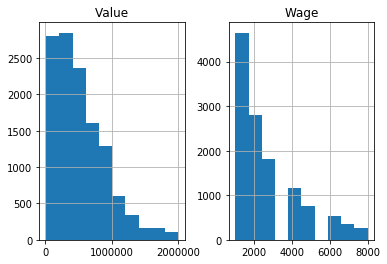

In [198]:
#Create the histograms again for the new data
new_data[['Value','Wage']].hist()

In [208]:
#Taking code to fit a model from boston houseing example
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

#Fit the most appropriate model
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid_obj = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid_fit = grid_obj.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid_fit.best_estimator_

In [202]:
new_features=data.drop(['Value','Wage'], axis=1)
new_Wage=data['Wage']
new_Value=data['Value']

In [260]:
#Lets first do all analysis on Wage
X_trainW, X_testW, y_trainW, y_testW = train_test_split(new_features, 
                                                    new_Wage, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

X_trainV, X_testV, y_trainV, y_testV = train_test_split(new_features, 
                                                    new_Value, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_trainW.shape[0]))

print("The testing set has {} samples.".format(X_testW.shape[0]))

Training set has 14325 samples.
The testing set has 3582 samples.


In [209]:
res=fit_model(X_trainW, y_trainW)
print("Parameter 'max_depth' is {} for the optimal model.".format(res.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [261]:
res2=fit_model(X_trainV, y_trainV)
print("Parameter 'max_depth' is {} for the optimal model.".format(res2.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [264]:
regressor = DecisionTreeRegressor(random_state = 0, max_depth=4) 
regressor=regressor.fit(X_trainW, y_trainW)
Wpredict=regressor.predict(np.array(X_testW))
Wage=[]
for i in Wpredict:
    Wage.append(int(i))
#Score the model for predicting Wages
rSquared=round(performance_metric(np.array(y_testW), np.array(Wage)),2)

print("[Wage] :: Our model got an R-Squared Value of {} ".format(rSquared))


[Wage] :: Our model got an R-Squared Value of 0.91 


In [265]:
regressor2 = DecisionTreeRegressor(random_state = 0, max_depth=4) 
regressor2=regressor2.fit(X_trainV, y_trainV)
Vpredict=regressor2.predict(np.array(X_testV))
Value=[]
for i in Vpredict:
    Value.append(int(i))
#Score the model for predicting Wages
rSquared2=round(performance_metric(np.array(y_testV), np.array(Value)),2)

print("[Value] :: Our model got an R-Squared Value of {} ".format(rSquared2))

[Value] :: Our model got an R-Squared Value of 1.0 


In [327]:
#Check for a random player how close our model predicts his wage and value
data_check=data[5000:5001]
data_check

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
5070,30,70,70,1600000,6000,1907,1,3,3,154,...,0,0,1,0,0,0,0,0,0,0


In [328]:
features_check=data_check.drop(['Wage','Value'],axis=1)

In [334]:
predictcheckWage=round(regressor.predict(features_check),0)
predictcheckValue=round(regressor2.predict(features_check),0)
print('For this player we predicted a Value of {}, and his actual Value was {}'.format(predictcheckValue,1600000))
print('For this player we predicted a Wage of {}, and his actual Wage was {}'.format(predictcheckWage,6000))

For this player we predicted a Value of 1814005.0, and his actual Value was 1600000
For this player we predicted a Wage of 7980.0, and his actual Wage was 6000
